# DataPlots (mainly ggplot2)

Deng Zhaoguo  
Invalid Date

# 加载包

In [1]:
library(gg.gap) 
library(openxlsx)
library(reshape2)
library(forcats)
library(dplyr)
library(ggplot2)
library(tidyverse)

# 读取处理数据

In [2]:
#read data
df = read.xlsx('datasheet.xlsx')

#process data
df$sample=as.factor(df$sample)

# force order
df$sample <- fct_inorder(df$sample)


#set x-axis to factor
df$time=as.factor(df$time)

# 画图调整选项

In [3]:
# theme most used 整合了很多功能
# AI 默认时灰色文字，灰色描边，改为黑色
# 线末端的 lineend 调整不会再对不齐
# 去掉横坐标标题和图例，加上图标题（居中）和y轴标题

theme_classic() +

theme(
    axis.line   = element_line(color = "black",lineend = "square"), 
    axis.ticks  = element_line(color = "black",lineend = "square"),
    axis.text   = element_text(color = "black"),
    axis.title  = element_text(color = "black"),
    
    legend.position = "none", 
    axis.title.x = element_blank(), 

    plot.title  = element_text(hjust = 0.5) 
)+

labs(title = "title", y = "ratio")+

# add anotation, p_label 可以时别的自己定义的
#labs(title = "title", y = "ratio")

annotate("text", x = 1.5, y = max(df$value) * 1.4, label = p_label, size = 5)+


#Adjustment: segment y axis
gg.gap(
  plot = p1,
  segments = c(2.5e6, 2.5e7),
  ylim = c(0, 2.25e8),
  tick_width = c(1e6, 2.5e7),
  rel_heights = c(0.2, 0, 0.4)
)+

# adjust axis
coord_cartesian(ylim = c(0, 100))+ # y范围
scale_x_continuous(breaks = c(0, 2, 4, 6, 9, 12, 24))+ # x轴刻度

scale_y_continuous(expand = expansion(mult = c(0, 0.1)), # bar plot从0开始没有下面留白
                    limits = c(0, 3))+ # 自己设置范围，这样可以正好停留在 tick 上

##Adjustment: axis and other

scale_color_manual(values = c("red", 'black'))+ # 线的颜色
scale_fill_manual(values = c("red", 'black'))+ # 填充颜色

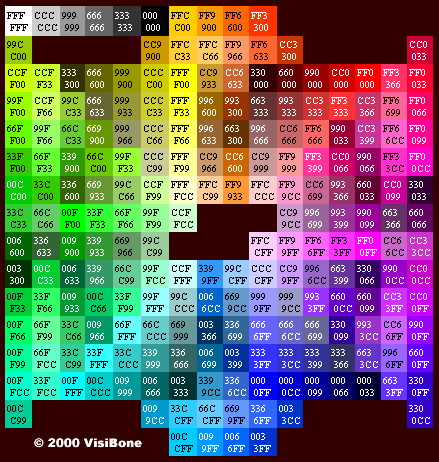

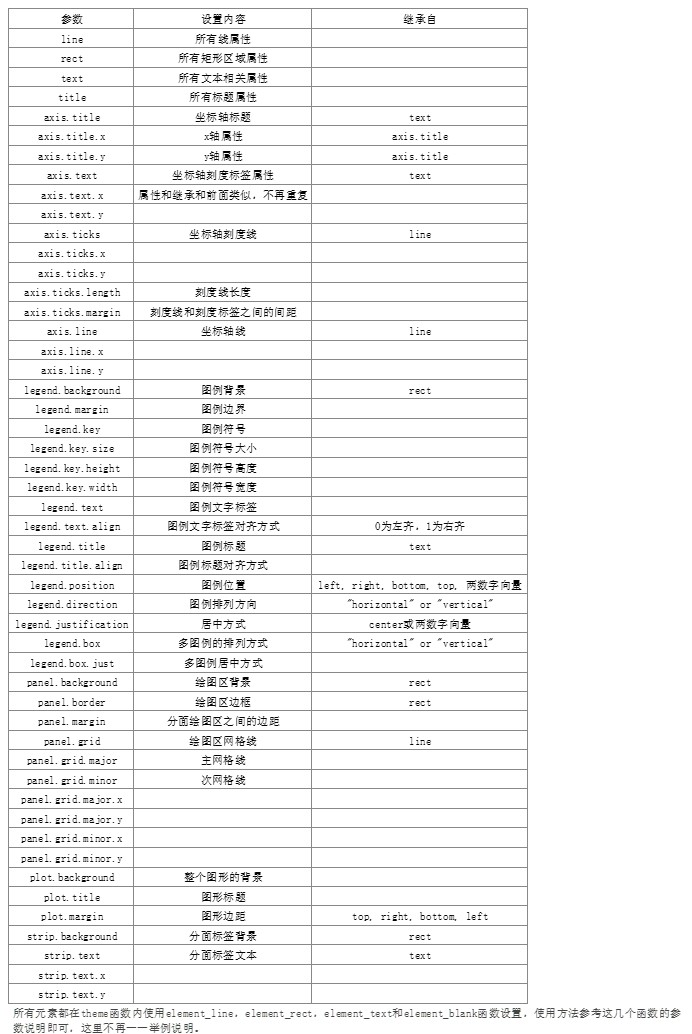

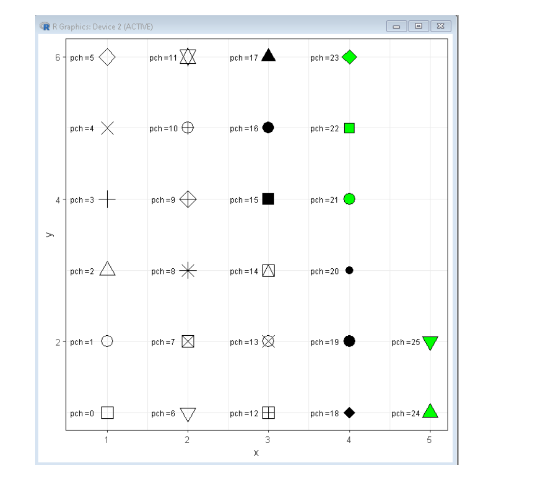

# I.画图

## 1.line plot grouped

**所有 grouped 都是类似 x-y-t 的多维度数据，比如 “基因型-表型-时间”
，如果只是 “基因型-表型” 这种简单图，去掉 dodge选项，也不需要 fill =
sample / color = sample**

In [4]:
#plot
bar_width = 0.35
jitter_width = 0.05
dodge_width = 0.5

p2 <-
  ggplot(df, aes(x = time, y = value, color = sample, fill = sample)) +

  # this draw line across time
  stat_summary(
    fun = mean,
    geom = "line",
    position = position_dodge(width = dodge_width),
    alpha = 1,
    linewidth= 0.3
  ) +
  
  # this draw box at each time point
  stat_summary(
    fun = mean,
    geom = "crossbar",
    fun.max = function(x) mean(x) + sd(x) ,
    fun.min = function(x) mean(x) - sd(x) ,
    position = position_dodge(width = dodge_width),
    width = bar_width,
    alpha = 1,
    linewidth= 0.3
  ) +
 
  # this draw point
  geom_point(
    size =1,
    shape = 16,
    alpha = 1,
    position = position_jitterdodge(jitter.width = jitter_width, dodge.width = dodge_width)
  )

p2

p2 + 
  theme_classic() +
  scale_fill_manual(values=c('#F8766D','#00BD57','yellow','purple','magenta'))+
  scale_color_manual(values=rep('black',5))+
  scale_x_continuous(breaks=c(0,3,6,9,12))+
  scale_y_continuous(breaks=c(0,30,60,90,120))

也可以用 fun.data来找平均数和 sd

In [5]:
p2 <-
  ggplot(df, aes(x = time, y = value, color = sample, fill = sample)) +
 
  stat_summary(
    fun = mean,
    geom = "line",
    position = position_dodge(width = dodge_width),
    alpha = 1,
    linewidth= 0.7,
    show.legend = T
  ) +

  
  stat_summary(
    fun.data = mean_sdl,
    fun.args = list(mult = 1),
    geom = "crossbar",
    linewidth= 0.2,
    position = position_dodge(width = dodge_width),
    width = bar_width,
    alpha = 1,
    show.legend = T
  ) +
  
  geom_point(
    size =1,
    shape = 16,
    alpha = 1,
    position = position_jitterdodge(jitter.width = jitter_width, dodge.width = dodge_width)
  )

p2

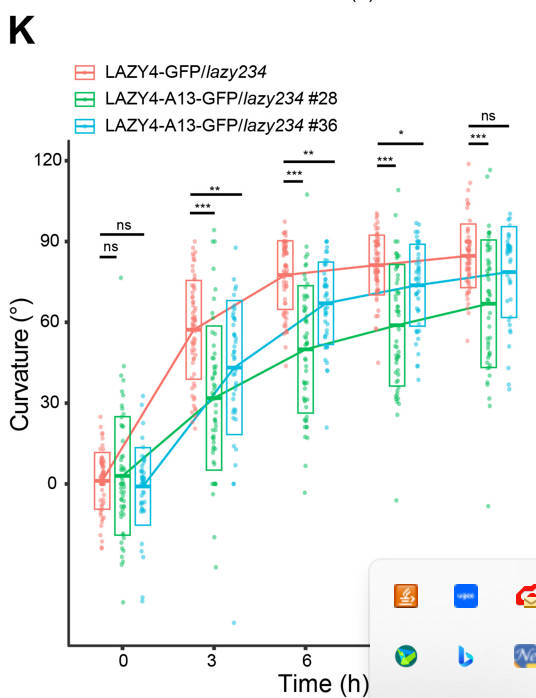

## 2.Barplot grouped

In [6]:
#set width
bar_width = 0.35
jitter_width = 0.05
dodge_width = 0.5

p1 <-
  ggplot(df, aes(x = time, y = value,  fill = sample)) +
  
  stat_summary(
    fun = mean,
    geom = "bar",
    alpha = 0.5,
    width = bar_width,
    position = position_dodge(width = dodge_width),
  ) +
  
  # 关键：下端不扩展（0），上端保留一点空白（5%）
  scale_y_continuous(expand = expansion(mult = c(0, 0.05)))
  
  stat_summary(
    fun = mean,
    geom = "errorbar",
    fun.max = function(x) mean(x) + sd(x) ,
    fun.min = function(x) mean(x) - sd(x) ,
    position = position_dodge(width = dodge_width),
    width = bar_width/2,
  )
  

  
p1 + 
  theme_classic() +
  scale_fill_manual(values=c('#F8766D','#00BD57','blue'))+
#  scale_color_manual(values=c('black','black','black'))+
  scale_y_continuous(breaks=c(0,30,60,90,120))


## 3.Boxplot grouped

In [7]:
#boxplot
bar_width = 0.35
jitter_width = 0.05
dodge_width = 0.5
line_width = 1

p4 <- ggplot(df, aes(x = time, y = value, fill = sample)) +
  geom_boxplot(
    outliers = F,
    alpha = 1, 
    width = bar_width,
    position = position_dodge(width = dodge_width)
  ) +

  geom_point(
    size =1,
    shape = 16,
    alpha = 1,
    position = position_jitterdodge(jitter.width = jitter_width, dodge.width = dodge_width)
  )
  

p4 +  
  theme_classic() +
  scale_fill_manual(values=c('#F8766D','#00BD57','blue'))

## 4.Violin plot

以PIN7的荧光强度为例子

In [8]:
# ==== set sample name ====
sampleName <- "PIN7"   

file_name <- paste0(sampleName, ".xlsx")
measure <- read.xlsx(file_name, sheet = 2)


# define the column to plot
df <- measure[, 1:2] %>% melt()

df <- df[!is.na(df[,2]), ]

colnames(df) <- c('sample', 'value')
#df$value <- df$value/median(df$value)

# ==== t-test ====
t_test_res <- t.test(value ~ sample, data = df, var.equal = TRUE)
print(t_test_res)
pval <- signif(t_test_res$p.value, 2)
p_label <- paste0("P = ", pval)

# ==== plot ====
p <- ggplot(df, aes(x = sample, y = value, fill = sample)) +
  geom_violin(
    alpha = 1, 
    width = 0.3, 
    trim = FALSE) +
  
  geom_jitter(
    size = 1, 
    shape = 16, 
    width = 0.08, 
    alpha = 1) +
  
  stat_summary(
    fun = median, 
    geom = "crossbar", 
    color = "black",
    linewidth = 0.5, 
    width = 0.3) 


p<- p + 
  theme_classic() +
  theme(
    axis.line   = element_line(color = "black"),
    axis.ticks  = element_line(color = "black"),
    axis.text   = element_text(color = "black"),
    axis.title  = element_text(color = "black"),
    
    axis.title.x = element_blank(),   # 去掉横坐标标题
    legend.position = "none", # 去掉图例
    plot.title  = element_text(hjust = 0.5) # 标题居中
  )+
  
  labs(title = sampleName, y = "Ratio") +
  
  annotate("text", 
           x = 1.5, 
           y = max(df$value) * 1.4,
           label = p_label, 
           size = 5)

添加vertical line展示范围

In [9]:
# add vertical lines
Q1 = function (x) quantile(x,0.25)
Q3 = function (x) quantile(x,0.75)
Max_wo = function (x) max(subset(x,x < Q3(x) + 1.5*IQR(x)))
Min_wo = function (x) min(subset(x,x > Q1(x) - 1.5*IQR(x)))

remove outlier, t.test 需要筛选掉 outlier，boxplot 只需要 outlier.shape
= NA

In [10]:
df$value <- df$value/median(df$value)

# ---- remove outlier for t-test ----
df_no_out <- df %>%
  group_by(sample) %>%
  mutate(is_outlier = value < (quantile(value, 0.25) - 1.5*IQR(value)) |
           value > (quantile(value, 0.75) + 1.5*IQR(value))) %>%
  ungroup()

# t-test for all data
t_test_res_noOut <- t.test(value ~ sample, data = filter(df_no_out, !is_outlier))
print(t_test_res_noOut)

# ---- plot with outlier ----
p <- ggplot(df, aes(x = sample, y = value, fill = sample)) +
  geom_boxplot(outlier.shape = NA, outlier.size = 1, alpha = 0.7,width=0.3) +
  geom_jitter(width = 0.1, size = 1, alpha = 0.9) +
  theme_classic() +
  scale_fill_manual(values = c('#F8766D', '#00BD57'))

print(p)

## 5.Circular histo

In [11]:
sample=read.xlsx("统计.xlsx",sheet = 1)  #read data, Macbook need add  sep=";" 

# transform data 
h = hist(sample,breaks = seq(from = range_from, to = range_to, by = degree))

d <- as.data.frame(list(Angle = h$mids, Frequency = h$density * degree))

circular 画图的参数

In [12]:
# plot options !!!!!!!
yoffset = -0.3 #set y offset(inner circle size)
ylimit=1  #set y limit#

degree = 30   #set interval degree here
mycolor = "maroon4"  #set color


Mydirection = 1 # set direction 1=clockwise,  -1 = anti-clockwise
Mystart = 0 # set start angle, pi=180
range_from = -180
range_to= 180

版本1

In [13]:
#plot version #1

ggplot(d, aes(x = Angle, y = Frequency)) +
  coord_polar(theta = "x", start = Mystart , direction = Mydirection) +
  scale_y_continuous(limits = c(yoffset,ylimit)) +
  
  geom_vline(xintercept = seq(range_from,range_to,degree),color="white")+
  geom_hline(yintercept=1,color="black")+
  geom_hline(yintercept=0.5,color="white")+
  
  geom_bar(stat = "identity", fill = mycolor) +
  
  
  theme(axis.text.x = element_blank()) +
  theme(axis.text.y = element_blank())+
  theme(panel.grid = element_blank()) 

版本2

In [14]:
#plot version #2

ggplot(d, aes(x = Angle, y = Frequency)) +
  coord_polar(theta = "x", start = Mystart , direction = Mydirection) +
  geom_bar(stat = "identity", fill = mycolor) +
  scale_y_continuous(limits = c(yoffset,ylimit)) +
  
  geom_hline(yintercept=0,color="black") +
  geom_segment(aes(x=seq(range_from, range_to-degree, degree), xend=seq(range_from, range_to-degree, degree), y= yoffset/10, yend=0),size=0.2,color="black")+
  
  theme_bw()+
  theme(panel.grid = element_blank()) +
  theme(axis.text.x = element_blank())+
  theme(axis.text.y = element_blank()) 

## 6.火山图

In [15]:
dfp <- dfp %>%
  mutate(gene_type = case_when(foldchange >= log10(2) & qval <= 0.05 ~ "up",
                               #log10FD <= log10(0.5) & qval <= 0.05 ~ "down",
                               TRUE ~ "ns"))  

#volcano plot
cols <- c("up" = "firebrick", "down" = "#26b3ff", "ns" = "grey") 
sizes <- c("up" = 3, "down" = 3, "ns" = 2) 
alphas <- c("up" = 1, "down" = 1, "ns" = 0.5)

dfp %>%
  ggplot(aes(x = foldchange,
             y = -log10(qval),
             fill = gene_type,    
             size = gene_type,
             alpha = gene_type)) + 
  geom_point(shape = 21, # Specify shape and colour as fixed local parameters    
             ) + 
  geom_hline(yintercept = -log10(0.05),
             linetype = "dashed") + 
  geom_vline(xintercept = c(log2(0.5), log2(2)),
             linetype = "dashed") +
  scale_fill_manual(values = cols) + # Modify point colour
  scale_size_manual(values = sizes) + # Modify point size
  scale_alpha_manual(values = alphas) + # Modify point transparency
  scale_x_continuous(breaks = c(seq(-6, 15, 2)),       
                     limits = c(-6, 15))  

## 7.Heatmap

-   DESeq2处理后存成 xlsx，然后每个比较都有 log2fc 和
    padj，尽量把需要的比较单独建立一个工作簿，分析时直接读取该工作簿

-   R中的 Merge 如果不排序(sort=F），是按摆在前面的文件 x
    定义的，可以方便一些处理省掉排序的时间

-   在 xlsx 可以不筛选，在R 读取数据后，画热图前再筛选也可以

-   画图后**保存** R
    程序，**再分析是对于熟练度和好习惯的考验！也是功力的体现~**

ggplot2版本比较慢，不适合很多基因画图

In [16]:
#pick genelist
genelist = read.xlsx("genelist_SAUR.xlsx",sheet=1)
genelist$gene=as.factor(genelist$gene)
genelist$gene <- fct_inorder(genelist$gene)
#dfLong$gene <- fct_rev(dfLong$gene)

#merge with read counts
deg=read.xlsx("RNASEQ-batch1_deg_analysis.xlsx",sheet=2)

m = merge(genelist,deg,by="gene",all.x = T,sort = F)

#write.xlsx(m,"SAURexpression-batch1.xlsx",rowNames=F)

hm_plot = m[,-c(1:2)]

row.names(hm_plot)=m[,2]

df=hm_plot[,c(1,3,5)]

#remove NA values, all-zero rows, and limit to range
df[is.na(df)]=0

df <- df[rowSums(df) != 0, ]

df[df>4]=4

df[df<(-4)]=-4

#scale if Z-score is required
df_scale_row = t(scale(t(df))) %>% as.data.frame()
df_scale_row <- remove_empty(df_scale_row,which="rows")

#transform
dfLong = df_scale_row %>%
  rownames_to_column("gene") %>%
  pivot_longer(-1,names_to = "condition",values_to = "value")

dfLong$condition=as.factor(dfLong$condition)
dfLong$condition <- fct_inorder(dfLong$condition)

#phylo-tree
phY <- df_scale_row %>%
  dist(method = "euclidean")%>%
  hclust(method = "complete")%>%
  ggtree(layout="rectangular",branch.length="none")


phX <- df_scale_row %>%
  t()%>%
  dist(method = "euclidean")%>%
  hclust(method = "complete")%>%
  ggtree(layout="rectangular",branch.length="none")+
  layout_dendrogram()

#heatmap
p1 <- ggplot(dfLong,aes(x=condition,y=gene,fill=value))+
  geom_raster()+
  scale_fill_gradient2(low="darkblue", high="orange", mid="white")+
  scale_y_discrete(position="right") +
  
  theme_minimal()+
  theme(panel.grid=element_blank())+
  
  theme(axis.text.y = element_blank())+
  theme(axis.text.x = element_text(size = 3.5, angle=60))
p1

p1 %>%
  insert_left(phY,width=.2) 

Pheatmap包比较快速，颜色默认也还不错

In [17]:
mydata<-read.csv("expr_log2means.csv")
df=mydata[,-1]
rownames(df)=mydata[,1]
df_scaled=t(scale(t(df)))

gene.to.plt = read.csv('22 genes for heatmap.csv')

idx = intersect(rownames(df_scaled),ROI_genelist)

df_plot=df_scaled[idx,]


p2 <- pheatmap(df_plot,
               cluster_rows = T,
               cluster_cols = FALSE,
               scale = "none", # already scaled
               color = colorRampPalette(c("navy", "white", "firebrick3"))(50),
               #gaps_col = c(2, 4, 6),  
               show_rownames = T,
               fontsize_col = 5
)


# extract cluster and gene order
row_dist <- dist(t(scale(t(log2(expr_matrix + 1)))))
row_clust <- hclust(row_dist, method = "complete")
gene_order <- rownames(expr_matrix)[row_clust$order]
expr_matrix <- expr_matrix[match(gene_order, rownames(expr_matrix)), ]

# II.统计检验（结合画图）

## chisq test 卡方检验，看是否符合遗传分离比常用

In [18]:
observed <- c(69, 68)    
expected_ratio <- c(1, 1) 

test_result <- chisq.test(
  x = observed,           
  p = expected_ratio/sum(expected_ratio)
)

print(test_result)

## student’s t.test : t test 只能比较两组的均值，注意一定是 **两组** 和 **均值**

In [19]:
# Read data
measure <- read.xlsx("2024.4.15-DR5-S2S3.xlsx", sheet = 2)
df <- measure[, 3:4] %>% melt()
df <- df[!is.na(df[,2]), ]
colnames(df) <- c('sample', 'value')
df$value <- df$value/median(df$value)

# mark all outliers
df_markOutiler <- df %>%
  group_by(sample) %>%
  mutate(is_outlier = value < (quantile(value, 0.25) - 1.5*IQR(value)) |
           value > (quantile(value, 0.75) + 1.5*IQR(value))) %>%
  ungroup()

In [20]:
# t-test for all data
t_test_res <- t.test(value ~ sample, data = df_markOutiler, var.equal=T)
print(t_test_res)

In [21]:
# t-test without outlier
t_test_res_noOut <- t.test(value ~ sample, data = filter(df_markOutiler, !is_outlier), var.equal=T)
print(t_test_res_noOut)

### 画图， 以 violin plot为例，标上P 值

In [22]:
p <- ggplot(df, aes(x = sample, y = value, fill = sample)) +
  geom_violin(alpha = 1, width = 0.3, trim = FALSE) +
  geom_jitter(size = 1, shape = 16, width = 0.08, alpha = 1) +
  stat_summary(fun = median, geom = "crossbar", color = "black",
               linewidth = 0.5, width = 0.3) 

标记 pval

In [23]:
pval <- signif(t_test_res$p.value, 2)
p_label <- paste0("P = ", pval)

p<- p + 
  labs(title = "Titile", y = "Test") +
  annotate("text", x = 1.5, y = max(df$value) * 1.4,
           label = p_label, size = 5) +
  theme_classic() +
  theme(
    legend.position = "none",
    plot.title = element_text(hjust = 0.5)
  )


print(p)

## Multiple comparison 多重比较

### ANOVA + post hoc: TukeyHSD 比较均值，再事后检验

In [24]:
# toy data
df <- data.frame(
  group = rep(c("nonS", "LAZY", "17-87", "D"), each=7),
  value = c(5,6,5,7,6,2,1 , 7,8,7,9,6,21,23, 8,9,7,10,8,10,19, 10,11,9,12,10,12,15)
)

df$group <- factor(df$group)

ANOVA

In [25]:
fit <- aov(value ~ group, data = df)
summary(fit)

TukeyHSD，为了方便请安装 agricolae

In [26]:
#install.packages('agricolae')
library(agricolae)

hsd <- HSD.test(fit, "group", group=TRUE)
print(hsd$groups)

# Prepare significance level table for plotting
sigLevel <- hsd$groups
sigLevel$group <- rownames(sigLevel)
colnames(sigLevel) <- c("mean", "levels", "group")

箱线图（其他图都行，+ geom_text 都是一样的）

In [27]:
# Visualization parameters
bar_width   <- 0.35
jitter_width <- 0.05
dodge_width <- 0.5

# Base plot: boxplot + jittered points
p <- ggplot(df, aes(x = group, y = value, fill = group)) +
  geom_boxplot(
    #outlier.shape = NA,                # hide outliers
    width = bar_width,
    position = position_dodge(width = dodge_width)
  ) +
  geom_point(
    size = 1,
    shape = 16,
    position = position_jitterdodge(
      jitter.width = jitter_width,
      dodge.width = dodge_width
    )
  ) +
  theme_classic() +
  scale_fill_manual(values = c('#F8766D', '#00BD57', 'blue', 'yellow'))

print(p)

加上显著性水平, 其实很简单就是有一个数据结构 sigLevel，也是 group,
levels的结构，把它加到原先的p上

In [28]:
# Add significance letters 
p <- p + geom_text(
  data = sigLevel,
  aes(x = group, y = max(df$value) + 1, label = levels),
  vjust = 0
)

print(p)

### ANOVA + post hoc: Dunnett 这个是明确对照组的，使用 multcomp 包

In [29]:
#install.packages('multcomp')
library(multcomp)

df <- data.frame(
  group = rep(c("nonS", "LAZY", "17_87", "D"), each=7),
  value = c(5,6,5,7,6,2,1 , 7,8,7,9,6,21,23, 8,9,7,10,8,10,19, 10,11,9,12,10,12,15)
)

设置对照组

In [30]:
control = "nonS"

df$group <- relevel(factor(df$group), ref = control)

ANOVA

In [31]:
fit <- aov(value ~ group, data = df)

Dunnett t-test

In [32]:
dunnett <- glht(fit, linfct = mcp(group = "Dunnett"))
summary_dunnett <- summary(dunnett)
print(summary_dunnett)

把结果里的 pval 提取出来并重命名列，加入 ”对照-NA“ 列

In [33]:
contrasts <- names(summary_dunnett$test$coefficients)     # e.g. "B - A"

group_names <- sub(' - .*',"",contrasts)

pvals     <- summary_dunnett$test$pvalues

# Build result table
sigLevel <- data.frame(
  group = c (control,group_names),
  p.val = c(NA, summary_dunnett$test$pvalues )
)

sigLevel$stars <- as.character(cut (sigLevel$p.val,
                       breaks = c(-Inf, 0.001, 0.01, 0.05, Inf),
                       labels = c("***", "**", "*", "ns")))

# don't draw anything on control group
sigLevel$stars[is.na(sigLevel$stars)]=c("")

画图

In [34]:
# Visualization parameters
bar_width   <- 0.35
jitter_width <- 0.05
dodge_width <- 0.5

# Base plot: boxplot + jittered points
p <- ggplot(df, aes(x = group, y = value, fill = group)) +
  geom_boxplot(
    #outlier.shape = NA,                # hide outliers
    width = bar_width,
    position = position_dodge(width = dodge_width)
  ) +
  geom_point(
    size = 1,
    shape = 16,
    position = position_jitterdodge(
      jitter.width = jitter_width,
      dodge.width = dodge_width
    )
  ) +
  theme_classic() +
  scale_fill_manual(values = c('#F8766D', '#00BD57', 'blue', 'yellow'))

print(p)

标记 P

In [35]:
p + geom_text(
  data = sigLevel,
  aes(x = group, y = max(df$value) + 1, label = stars),
  vjust = 0
)

### 更广泛的校正（不止是均值，各种<多重>相关性检验之后也可以校正 p value）应该用的最多的是BH （比如 RNASeq等组学），最严格的是直接除以test数目的 bonferroni（GWAS）

In [36]:
# Controls FWER 
p.adjust(pvalues,method="bonferroni") 

# control FWER by hochberg
p.adjust(pvalues,method="hochberg")

# Controls FDR 
p.adjust(pvalues,method="BH") 
p.adjust(pvalues,method="BY")

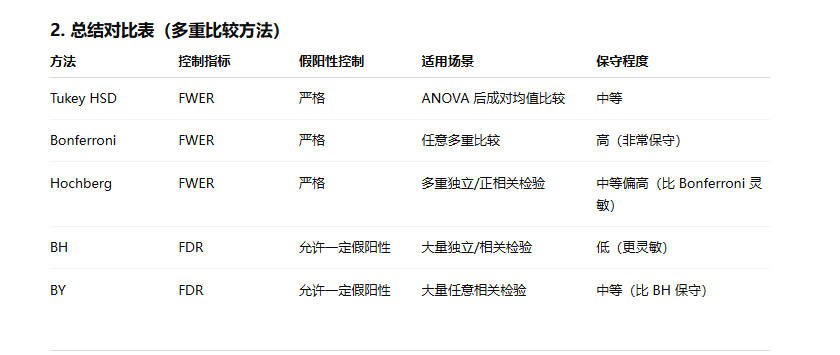

Case: LAZY回补line，先 KS test （比较两个分布是否类似）计算各组比较的
pvalue, 再用 bonferroni 校正

In [37]:
nlen=7
p=vector(length=(nlen-1))
for (j in 2:nlen){
  i = 1
  p[j-1]=ks.test(mydata[,i],mydata[,j])$p.value
}

padj = p.adjust(p,method = "bonferroni")
padj